# **Design and Analysis of Algorithms Searching for Top-K High-Utility Itemsets from Unstable Databases with Both Positive and Negative Utilities**

## **Introduction**

The discovery of valuable patterns in large datasets is a critical area of research in data mining. Among various techniques, **High-Utility Itemset Mining (HUIM)** has emerged as a powerful approach for identifying itemsets that yield the most significant utilities, such as profit or impact. However, real-world datasets often exhibit complexity due to **unstable databases** (dynamic updates or changes) and the presence of **both positive and negative utilities** (profits and losses). These challenges necessitate the development of advanced algorithms to efficiently mine **Top-K High-Utility Itemsets (THUIs)**.

This research focuses on the **design and analysis of algorithms** that can handle these challenges while ensuring scalability and efficiency. The input data consists of transactional datasets with utilities represented as quantities and profits. The output is a list of Top-K itemsets ranked by their utility scores. Below, we explore the critical terms, the structure of the input data, and the expected output.

---

## **Key Terms**

### **1. High-Utility Itemset Mining (HUIM)**

Identifies itemsets with high utility values, incorporating both quantities and profits instead of relying solely on frequency. Utilities are calculated as:

$$
\text{Utility(Itemset)} = \sum (\text{Quantity} \times \text{Profit})
$$



The top-K itemsets with the highest utility scores in the dataset. \( K \) is user-defined, making the mining process flexible by avoiding a fixed minimum utility threshold.

### **3. Unstable Databases**

Databases that frequently change due to additions, deletions, or updates. Algorithms designed for such environments must efficiently recompute utility scores without reprocessing the entire dataset.

### **4. Positive and Negative Utilities**

Utilities can be:

- **Positive Utilities**: Represent gains (e.g., revenue).
- **Negative Utilities**: Represent losses (e.g., costs). Algorithms must account for both types, balancing opposing impacts.

---

## **Input and Output**

### **Input Description**

The input dataset \( D \) is a collection of transactions, where each transaction contains:

- **TID**: Transaction identifier (string).
- **Items**: List of items in the transaction (list of strings).
- **Quantities**: List of quantities corresponding to each item (list of integers).
- **Profits**: List of profits or utilities for each item (list of integers; can be positive or negative).

Example input:

$$
D = \begin{bmatrix}
\{ \text{TID: } 'T1', \text{ Items: } ['a', 'b', 'd', 'e', 'f', 'g'], \text{ Quantities: } [2, 2, 1, 3, 2, 1], \text{ Profits: } [-2, 1, 4, 1, -1, -2] \} \\
\{ \text{TID: } 'T2', \text{ Items: } ['b', 'c'], \text{ Quantities: } [1, 5], \text{ Profits: } [-1, 1] \} \\
\vdots
\end{bmatrix}
$$

### **Output Description**

The output is a ranked list of itemsets and their respective utility scores. Each element is structured as:

- **Itemset**: List of items in the itemset (list of strings).
- **Utility Score**: Total utility score for the itemset (integer).

Example output:

$$
\begin{bmatrix}
[\{ \text{'c', 'd', 'e'} \}, 37], \\
[\{ \text{'d', 'e'} \}, 37], \\
[\{ \text{'b', 'd', 'e'} \}, 31], \\
[\{ \text{'c', 'd'} \}, 31], \\
\vdots
\end{bmatrix}
$$

---

## **Algorithm Workflow**

### **1. Input Processing**

- Parse \( D \) into a suitable data structure (e.g., dictionaries or lists).
- Compute the utility score for each itemset:
  $$
  \text{Utility(Itemset)} = \sum (\text{Quantity} \times \text{Profit})
  $$



- Generate potential itemsets using techniques like prefix trees or enumeration.
- Prune low-utility itemsets dynamically.
- Maintain a priority queue or list to keep track of the top-K itemsets.



- Sort the final itemsets by their utility scores in descending order.
- Return the top-K itemsets.

---

## **Data Structures and Data Types**



- **Transaction List**: A list of dictionaries.
- **TID**: String.
- **Items**: List of strings.
- **Quantities**: List of integers.
- **Profits**: List of integers.



- **Itemset List**: A list of tuples or lists.
  - **Itemset**: List of strings.
  - **Utility Score**: Integer.

---

## **Conclusion**

The algorithms for mining Top-K High-Utility Itemsets must efficiently handle unstable databases and the duality of positive and negative utilities. By leveraging robust data structures and optimization techniques, this research aims to provide scalable and adaptable solutions for real-world applications in e-commerce, healthcare, and financial analysis.


# **Premilaries**


In [4]:
def u(X, transaction=None, D=None):
    """
    Calculate the utility of a set of items X in a transaction or a database of transactions.

    Parameters:
    X (set or list of str): A set or list of items (e.g., ['a', 'b'] or {'a', 'b'}).
    transaction (dict, optional): A single transaction represented as a dictionary with:
        - 'Items' (list of str): List of item names in the transaction (e.g., ['a', 'b', 'c']).
        - 'Quantities' (list of int): List of quantities corresponding to the items.
        - 'Profits' (list of int): List of profits (can be positive or negative) corresponding to the items.
    D (list of dict, optional): A database of transactions, where each transaction follows the same structure as 'transaction'.

    Returns:
    int: The total utility of the itemset X in the given transaction or across the database D.
    """
    if X == "" or not X:
        return 0

    if transaction:
        return sum(
            transaction["Quantities"][i] * transaction["Profits"][i]
            for i, item in enumerate(transaction["Items"])
            if item in X
        )

    if D:
        return sum(
            u(X, transaction=transaction)
            for transaction in D
            if all(item in transaction["Items"] for item in X)
        )

In [5]:
# ------------ Example of u(X, transaction=None, D=None) ------------
# Example transaction
transaction = {
    "Items": ["a", "b", "c"],
    "Quantities": [2, 3, 1],
    "Profits": [10, -5, 20],
}

# Example database of transactions
database = [
    {"Items": ["a", "b", "c"], "Quantities": [2, 3, 1], "Profits": [10, -5, 20]},
    {"Items": ["a", "c"], "Quantities": [1, 2], "Profits": [15, 25]},
    {"Items": ["b", "c"], "Quantities": [4, 1], "Profits": [-10, 30]},
]

# Define the itemset X
X = ["a", "c"]

# Calculate utility for a single transaction
utility_single = u(X, transaction=transaction)
print(f"Utility of itemset {X} in the single transaction: {utility_single}")

# Calculate utility across the database
utility_database = u(X, D=database)
print(f"Utility of itemset {X} across the database: {utility_database}")

Utility of itemset ['a', 'c'] in the single transaction: 40
Utility of itemset ['a', 'c'] across the database: 105


In [6]:
def rru(X, transaction):
    """
    Calculate the remaining utility of a set of items X in a given transaction.
    This represents the utility of the items in the transaction that come after
    the last item in X. Only items with positive utility are considered.

    Parameters:
    X (set or list of str): A set or list of items (e.g., ['a', 'b', 'c']) whose
                            remaining utility is to be calculated in the transaction.
    transaction (dict): A dictionary representing a single transaction with the following structure:
        - 'Items' (list of str): A list of items in the transaction (e.g., ['a', 'b', 'c']).
        - 'Quantities' (list of int): A list of quantities corresponding to the items.
        - 'Profits' (list of int): A list of profits (can be positive or negative) corresponding to the items.

    Returns:
    float: The remaining utility of the items in the transaction that appear after the last item in X,
           considering only items with positive utility.
    """

    items = transaction["Items"]
    RE = items if not X or X[-1] not in items else items[items.index(X[-1]) + 1 :]
    return sum(u(x, transaction) for x in RE if u(x, transaction) > 0)

In [7]:
transaction = {
    "Items": ["a", "b", "c", "d", "e"],
    "Quantities": [2, 3, 1, 4, 5],
    "Profits": [5, 10, -2, 20, 15],
}
X = ["a", "b"]
remaining_utility = rru(X, transaction)
print(f"Remaining utility after {X} in the transaction: {remaining_utility}")

Remaining utility after ['a', 'b'] in the transaction: 155


In [8]:
def rtu(transaction):
    """
    Calculate the total utility of a transaction by summing the utility of
    all items in the transaction that have a positive utility.

    Parameters:
    transaction (dict): A dictionary representing a single transaction in the database.
                         It contains:
                         - 'Items' (list of str): A list of items involved in the transaction.
                         - 'Quantities' (list of int): Quantities corresponding to the items.
                         - 'Profits' (list of int): Profits corresponding to the items (can be positive or negative).

    Returns:
    float: The total utility of the transaction, which is the sum of the utilities
           of all items in the transaction that have a positive utility.
    """
    items = transaction["Items"]
    return sum(u(item, transaction) for item in items if u(item, transaction) > 0)

In [9]:
def rlu(X, z, D=None, Tk=None):
    """
    Calculate the remaining lower utility (RLU) of a set of items X with
    respect to a set of items z in a database of transactions D. This is used
    to evaluate the potential utility of itemsets, especially in the context of
    mining high-utility itemsets in databases.

    Parameters:
    X (set or list of str): A set or list of items (e.g., ['a', 'b', 'c']).
    z (str): A single item (e.g., 'd') to be considered along with X for the utility calculation.
    D (list of dict, optional): A list of transactions, where each transaction is represented as a dictionary
        containing:
        - 'TID' (str): Transaction ID.
        - 'Items' (list of str): List of items involved in the transaction.
        - 'Quantities' (list of int): Quantities corresponding to the items.
        - 'Profits' (list of int): Profits (can be positive or negative) corresponding to the items.
    Tk (dict, optional): A specific transaction (Tk) where the utility is computed for the set X and z.

    Returns:
    float: The remaining lower utility (RLU) of X with respect to z, either in a given transaction Tk or across
           all transactions in the database D.
    """
    items = [z] if not X else X + [z]

    if Tk:
        if not X:
            return rtu(Tk)
        total = 0
        if all(item in Tk["Items"] for item in items):
            for x in X:
                total += u(x, Tk) + rru(x, Tk)

        return total

    return sum(
        u(x, transaction) + rru(x, transaction)
        for transaction in D
        if all(item in transaction["Items"] for item in items)
        for x in X
    )

In [10]:
# --------- Example of rlu(X, z, D=None, Tk=None) ----------
# Define a database of transactions
D = [
    {
        "TID": "T1",
        "Items": ["a", "b", "c"],
        "Quantities": [2, 3, 1],
        "Profits": [5, 10, -2],
    },
    {"TID": "T2", "Items": ["a", "d"], "Quantities": [1, 4], "Profits": [20, 5]},
    {"TID": "T3", "Items": ["b", "c"], "Quantities": [2, 1], "Profits": [15, -1]},
    {
        "TID": "T4",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [3, 2, 1, 1],
        "Profits": [10, 20, 5, 5],
    },
]

# Define the itemset X and the item z
X = ["a", "b"]
z = ["c"]

# Calculate the remaining lower utility of itemset X with respect to item z across the database D
remaining_lower_utility = rlu(X, z, D=D)
print(
    f"Remaining lower utility of {X} with respect to '{z}' across the database: {remaining_lower_utility}"
)

Remaining lower utility of ['a', 'b'] with respect to '['c']' across the database: 0


In [11]:
# ---------- Example of  rtu(transaction): -------------
# Define a single transaction
transaction = {
    "Items": ["a", "b", "c", "d"],
    "Quantities": [2, 3, 1, 4],
    "Profits": [5, 10, -2, 20],
}

# Calculate the total utility of the transaction
total_utility = rtu(transaction)
print(f"Total utility of the transaction: {total_utility}")

Total utility of the transaction: 120


In [12]:
def rtwu(X, D=None, Tk=None):
    """
    Calculate the total utility of a set of items X in a database of transactions D.
    If the database is not provided, it computes the utility for a given transaction Tk.

    Parameters:
    X (set or list of str): A set or list of items whose total utility is to be calculated.
    D (list of dicts, optional): A list of transactions, where each transaction is a dictionary containing:
        - 'Items' (list of str): The items involved in the transaction.
        - 'Quantities' (list of int): The quantities corresponding to the items in the transaction.
        - 'Profits' (list of int): The profits corresponding to the items in the transaction.
    Tk (dict, optional): A single transaction. If provided, the function calculates utility for this specific transaction instead of the entire database.

    Returns:
    float: The total utility of the itemset X in the database D or in the single transaction Tk.
    """
    if Tk:
        return sum(
            Tk["Profits"][index] * Tk["Quantities"][index]
            for index, ix in enumerate(Tk["Items"])
            if Tk["Profits"][index] > 0
        )

    return sum(
        rtu(transaction)
        for transaction in D
        if all(item in transaction["Items"] for item in X)
    )

In [13]:
# Example of rtwu(X, D=None, Tk=None)

# --------- Example -----------
# Define a database of transactions
D = [
    {
        "TID": "T1",
        "Items": ["a", "b", "c"],
        "Quantities": [2, 3, 1],
        "Profits": [5, 10, -2],
    },
    {"TID": "T2", "Items": ["a", "d"], "Quantities": [1, 4], "Profits": [20, 5]},
    {"TID": "T3", "Items": ["b", "c"], "Quantities": [2, 1], "Profits": [15, -1]},
    {
        "TID": "T4",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [3, 2, 1, 1],
        "Profits": [10, 20, 5, 5],
    },
]

# Define the itemset X
X = ["a", "b"]

# Calculate the total utility of itemset X across the database D
total_utility_db = rtwu(X, D=D)
print(f"Total utility of {X} across the database: {total_utility_db}")

# Alternatively, calculate the total utility for a specific transaction Tk
Tk = {"Items": ["a", "b", "c"], "Quantities": [2, 3, 1], "Profits": [5, 10, -2]}

total_utility_tk = rtwu(X, Tk=Tk)
print(f"Total utility of {X} in the transaction Tk: {total_utility_tk}")

Total utility of ['a', 'b'] across the database: 120
Total utility of ['a', 'b'] in the transaction Tk: 40


In [14]:
def rtu(transaction):
    """
    Calculate the total utility of a transaction by summing the utility of all
    items in the transaction that have a positive utility.

    Parameters:
    transaction (dict): A dictionary representing a transaction, which contains:
        - 'Items' (list of str): A list of items involved in the transaction.
        - 'Quantities' (list of int): A list of quantities corresponding to each item in the transaction.
        - 'Profits' (list of int): A list of profits (can be positive or negative) corresponding to each item.

    Returns:
    float: The total utility of the transaction. This is the sum of the positive utilities of the items in the transaction.
    """
    items = transaction["Items"]
    return sum(u([item], transaction) for item in items if u([item], transaction) > 0)

In [15]:
def rsu(X, z, D=None, Tk=None):
    """
    Calculate the remaining upper utility of a set of items X
    with respect to a set of items z in a database of transactions D.

    Parameters:
    X (list of str): A list of items representing a set of items.
    z (list of str): A list of items representing another set of items.
    D (list of dict, optional): A list of transactions, where each transaction is a dictionary containing:
        - 'Items' (list of str): The items involved in the transaction.
        - 'Quantities' (list of int): The quantities corresponding to the items in the transaction.
        - 'Profits' (list of int): The profits corresponding to the items in the transaction.
    Tk (dict, optional): A single transaction. If provided, the function calculates the remaining upper utility for that specific transaction.

    Returns:
    float: The remaining upper utility of X with respect to z in D or in Tk.
    """
    items = z if not X else X + z
    if Tk:
        total = 0
        if all(item in Tk["Items"] for item in items):
            total = u(X, Tk) + u(z, Tk) + rru(z, Tk)
        return total

    return sum(
        u(X, transaction) + u(z, transaction) + rru(z, transaction)
        for transaction in D
        if all(item in transaction["Items"] for item in items)
    )

In [16]:
# ------ Example of rsu(X, z, D=None, Tk=None) ----------

# Define a database of transactions
D = [
    {
        "TID": "1",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [2, 3, 1, 4],
        "Profits": [10, -5, 20, 15],
    },
    {
        "TID": "2",
        "Items": ["a", "c", "e"],
        "Quantities": [1, 2, 5],
        "Profits": [10, 20, 30],
    },
    {
        "TID": "3",
        "Items": ["b", "d", "e"],
        "Quantities": [3, 1, 2],
        "Profits": [5, 15, 10],
    },
]

# Define sets of items
X = ["a", "c"]
z = ["b", "d"]

# Calculate the remaining upper utility of X with respect to z across the database D
remaining_upper_utility_db = rsu(X, z, D=D)
print(
    f"Remaining upper utility of X with respect to z in the database: {remaining_upper_utility_db}"
)

# Define a specific transaction for which we want to calculate remaining upper utility
Tk = {
    "Items": ["a", "b", "c", "d"],
    "Quantities": [2, 3, 1, 4],
    "Profits": [10, -5, 20, 15],
}

# Calculate the remaining upper utility of X with respect to z in the specific transaction Tk
remaining_upper_utility_tk = rsu(X, z, Tk=Tk)
print(
    f"Remaining upper utility of X with respect to z in the specific transaction: {remaining_upper_utility_tk}"
)

Remaining upper utility of X with respect to z in the database: 85
Remaining upper utility of X with respect to z in the specific transaction: 85


In [17]:
def remove_items_outside_items_database(D, items):
    """
    Remove items that are not in the given list
    from all transactions in the database.

    Parameters:
    D (list of dict): A list of transactions, where each transaction is a dictionary containing:
        - 'Items' (list of str): A list of items in the transaction.
        - 'Quantities' (list of int): A list of quantities corresponding to the items in the transaction.
        - 'Profits' (list of int): A list of profits corresponding to the items in the transaction.
    items (list of str): A list of items that should be kept in the transactions. Items not in this list will be removed.

    Returns:
    list of dict: The modified database with items not in the given list removed from all transactions.
    """
    items_set = set(items)
    for transaction in D:
        filtered = [
            (item, qty, prof)
            for item, qty, prof in zip(
                transaction["Items"], transaction["Quantities"], transaction["Profits"]
            )
            if item in items_set
        ]
        transaction["Items"], transaction["Quantities"], transaction["Profits"] = (
            (zip(*filtered))
            if filtered
            else (
                [],
                [],
                [],
            )
        )
    return D

In [18]:
# ------ Example of remove_items_outside_items_database(D, items) ----------

# Define a database of transactions
D = [
    {
        "TID": "1",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [2, 3, 1, 4],
        "Profits": [10, -5, 20, 15],
    },
    {
        "TID": "2",
        "Items": ["a", "c", "e"],
        "Quantities": [1, 2, 5],
        "Profits": [10, 20, 30],
    },
    {
        "TID": "3",
        "Items": ["b", "d", "e"],
        "Quantities": [3, 1, 2],
        "Profits": [5, 15, 10],
    },
]

# Define a list of items to keep
items_to_keep = ["a", "c"]

# Remove items not in the items_to_keep list from the database D
modified_database = remove_items_outside_items_database(D, items_to_keep)

# Print the modified database
print("Modified database after removing items not in the keep list:")
for transaction in modified_database:
    print(transaction)

Modified database after removing items not in the keep list:
{'TID': '1', 'Items': ('a', 'c'), 'Quantities': (2, 1), 'Profits': (10, 20)}
{'TID': '2', 'Items': ('a', 'c'), 'Quantities': (1, 2), 'Profits': (10, 20)}
{'TID': '3', 'Items': [], 'Quantities': [], 'Profits': []}


In [19]:
def sorted_transaction_items(D, items):
    """
    Sort the items, profits, and quantities within each transaction
    in the database D based on a specified order of items.

    Parameters:
    D (list of dict): A list of transactions, where each transaction is represented as a dictionary containing:
        - 'Items' (list of str): A list of items in the transaction (e.g., ['a', 'b', 'c']).
        - 'Quantities' (list of int): A list of quantities corresponding to the items in the transaction (e.g., [2, 1, 4]).
        - 'Profits' (list of int): A list of profits corresponding to the items in the transaction (e.g., [5, -1, 3]).
    items (list of str): A list of items in the desired order. The items in each transaction will be sorted according to this list.

    Returns:
    list of dict: The modified database with items, profits, and quantities sorted within each transaction according to the specified order.
    """
    ordered_map = {item: i for i, item in enumerate(items)}
    for transaction in D:
        zip_trans = list(
            zip(transaction["Items"], transaction["Profits"], transaction["Quantities"])
        )
        sorted_item = sorted(
            zip_trans, key=lambda x: ordered_map.get(x[0], float("inf"))
        )
        transaction["Items"], transaction["Profits"], transaction["Quantities"] = zip(
            *sorted_item
        )
    return D

In [20]:
# ------ Example of sorted_transaction_items(D, items) ----------

# Define a database of transactions
D = [
    {
        "TID": "1",
        "Items": ["b", "a", "c"],
        "Quantities": [3, 2, 1],
        "Profits": [5, 10, 20],
    },
    {
        "TID": "2",
        "Items": ["c", "e", "a"],
        "Quantities": [1, 5, 2],
        "Profits": [15, 30, 10],
    },
    {
        "TID": "3",
        "Items": ["a", "d", "b"],
        "Quantities": [4, 1, 3],
        "Profits": [10, 15, 5],
    },
]

# Define the desired order of items
desired_order = ["a", "b", "c", "d", "e"]

# Sort the items, profits, and quantities within each transaction based on the desired order
sorted_database = sorted_transaction_items(D, desired_order)

# Print the modified database
print("Modified database after sorting items within each transaction:")
for transaction in sorted_database:
    print(transaction)

Modified database after sorting items within each transaction:
{'TID': '1', 'Items': ('a', 'b', 'c'), 'Quantities': (2, 3, 1), 'Profits': (10, 5, 20)}
{'TID': '2', 'Items': ('a', 'c', 'e'), 'Quantities': (2, 1, 5), 'Profits': (10, 15, 30)}
{'TID': '3', 'Items': ('a', 'b', 'd'), 'Quantities': (4, 3, 1), 'Profits': (10, 5, 15)}


In [21]:
def sorted_transactions(D, items):
    """
    Sort the transactions in the database D based
    on the last item in each transaction.
    If two transactions have the same last item,
    they are sorted in descending order of the length of the transaction.

    Parameters:
    D (list of dict): A list of transactions, where each transaction is represented as a dictionary containing:
        - 'Items' (list of str): A list of items in the transaction.
        - 'Quantities' (list of int): A list of quantities corresponding to the items in the transaction.
        - 'Profits' (list of int): A list of profits corresponding to the items in the transaction.
    items (list of str): A list specifying the desired order of items.

    Returns:
    list of dict: The sorted database.
    """
    ordered_map = {item: i for i, item in enumerate(items)}
    return sorted(
        D,
        key=lambda x: (ordered_map.get(x["Items"][-1], float("inf")), len(x["Items"])),
        reverse=True,
    )

In [22]:
# ------ Example of sorted_transactions(D, items) ----------

# Define a database of transactions
D = [
    {
        "TID": "1",
        "Items": ["b", "a", "c"],
        "Quantities": [3, 2, 1],
        "Profits": [5, 10, 20],
    },
    {
        "TID": "2",
        "Items": ["c", "e", "a"],
        "Quantities": [1, 5, 2],
        "Profits": [15, 30, 10],
    },
    {
        "TID": "3",
        "Items": ["a", "d", "b"],
        "Quantities": [4, 1, 3],
        "Profits": [10, 15, 5],
    },
    {"TID": "4", "Items": ["d", "b"], "Quantities": [1, 1], "Profits": [5, 10]},
]

# Define the desired order of items
desired_order = ["a", "b", "c", "d", "e"]

# Sort the transactions based on the last item in each transaction
sorted_database = sorted_transactions(D, desired_order)

# Print the sorted database
print("Sorted database based on the last item in each transaction:")
for transaction in sorted_database:
    print(transaction)

Sorted database based on the last item in each transaction:
{'TID': '1', 'Items': ['b', 'a', 'c'], 'Quantities': [3, 2, 1], 'Profits': [5, 10, 20]}
{'TID': '3', 'Items': ['a', 'd', 'b'], 'Quantities': [4, 1, 3], 'Profits': [10, 15, 5]}
{'TID': '4', 'Items': ['d', 'b'], 'Quantities': [1, 1], 'Profits': [5, 10]}
{'TID': '2', 'Items': ['c', 'e', 'a'], 'Quantities': [1, 5, 2], 'Profits': [15, 30, 10]}


In [23]:
def add_utility_into_database(D):
    """
    Adds a 'Utilities' key to each transaction in the database.

    This function processes a list of transactions where each transaction contains
    items, their respective profits, and quantities. It calculates the utility for
    each item in a transaction as the product of its profit and quantity, and adds
    this data as a new key 'Utilities' to the transaction.

    Parameters:
    D (list): A list of transactions. Each transaction is a dictionary with the following keys:
        - "Items" (list): List of item names.
        - "Profits" (list): List of profits associated with the items.
        - "Quantities" (list): List of quantities associated with the items.

    Returns:
    list: The updated list of transactions, where each transaction now includes:
        - "Utilities" (dict): A dictionary mapping each item to its utility
          (calculated as `profit * quantity`).
    """
    for Tk in D:
        Tk["Utilities"] = {
            item: profit * quantity
            for item, profit, quantity in zip(
                Tk["Items"], Tk["Profits"], Tk["Quantities"]
            )
        }
    return D

In [24]:
D = [
    {
        "TID": "1",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [2, 3, 1, 4],
        "Profits": [10, -5, 20, 15],
    }
]
D = add_utility_into_database(D)
for d in D:
    print(d)

{'TID': '1', 'Items': ['a', 'b', 'c', 'd'], 'Quantities': [2, 3, 1, 4], 'Profits': [10, -5, 20, 15], 'Utilities': {'a': 20, 'b': -15, 'c': 20, 'd': 60}}


In [25]:
def create_new_database(D, X):
    """
    Create a new database Dx from D by including
    only the items that come after X in each transaction of D.

    Parameters:
    D (list of dict): The original database of transactions, where each transaction is represented as a dictionary.
        Each transaction dictionary contains the following keys:
        - 'TID' (string): The transaction ID.
        - 'Items' (list of strings): A list of items in the transaction.
        - 'Quantities' (list of integers): A list of quantities corresponding to the items in the transaction.
        - 'Profits' (list of integers): A list of profits corresponding to the items in the transaction.

    X (list of strings): A list of items representing the prefix set. Only the items that come after the last item in X
        will be included in each transaction.

    Returns:
    list of dict: The modified database (Dx), containing only the items that come after X in each transaction of D.
        Each dictionary in Dx will have the same structure as the transactions in D, with 'Items', 'Quantities', and 'Profits'
        filtered to include only the items after the prefix set X.

    """
    merging_dict = {}
    Dx = []
    i = 0
    for Tk in D:
        if X[-1] not in Tk["Items"]:
            continue

        index = Tk["Items"].index(X[-1]) + 1
        if index == len(Tk["Items"]):
            continue

        tid = Tk["TID"]
        quantities = Tk["Quantities"][index:]
        profits = Tk["Profits"][index:]
        utilities = Tk["Utilities"]
        items = tuple(Tk["Items"][index:])

        if items in merging_dict:
            old_index = merging_dict[items]["TID"]
            Dx[old_index]["Quantities"] = [
                x + y for x, y in zip(Dx[old_index]["Quantities"], quantities)
            ]
            Dx[old_index]["Profits"] = [
                x + y for x, y in zip(Dx[old_index]["Profits"], profits)
            ]
            Dx[old_index]["Utilities"] = {
                item: Dx[old_index]["Utilities"].get(item, 0) + utilities.get(item, 0)
                for item in utilities.keys()
            }
        else:
            merging_dict[items] = {"TID": len(Dx)}
            Dx.append(
                {
                    "TID": tid,
                    "Items": items,
                    "Quantities": quantities,
                    "Profits": profits,
                    "Utilities": utilities,
                }
            )
        i += 1
    return Dx

In [26]:
# ------ Example of create_new_database(D, X) ----------

# Define the original database of transactions
D = [
    {
        "TID": "1",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [2, 3, 1, 4],
        "Profits": [10, -5, 20, 15],
    },
    {
        "TID": "2",
        "Items": ["a", "c", "e", "f"],
        "Quantities": [1, 2, 5, 3],
        "Profits": [10, 20, 30, 25],
    },
    {
        "TID": "3",
        "Items": ["b", "d", "e"],
        "Quantities": [3, 1, 2],
        "Profits": [5, 15, 10],
    },
    {
        "TID": "4",
        "Items": ["a", "b", "c", "e"],
        "Quantities": [2, 1, 3, 4],
        "Profits": [10, 5, 20, 30],
    },
]

# Define the prefix set X
X = ["a", "b"]

# Create a new database Dx by including only the items that come after X in each transaction of D
new_database = create_new_database(add_utility_into_database(D), X)

# Print the new database
print("New database after filtering items that come after X:")
for transaction in new_database:
    print(transaction)

New database after filtering items that come after X:
{'TID': '1', 'Items': ('c', 'd'), 'Quantities': [1, 4], 'Profits': [20, 15], 'Utilities': {'a': 20, 'b': -15, 'c': 20, 'd': 60}}
{'TID': '3', 'Items': ('d', 'e'), 'Quantities': [1, 2], 'Profits': [15, 10], 'Utilities': {'b': 15, 'd': 15, 'e': 20}}
{'TID': '4', 'Items': ('c', 'e'), 'Quantities': [3, 4], 'Profits': [20, 30], 'Utilities': {'a': 20, 'b': 5, 'c': 60, 'e': 120}}


In [27]:
def create_RSU_RLU_UA(D, B, items):
    """
    Create a dictionary containing the RSU (Remaining Support Utility),
    RLU (Remaining Lower Utility), and UA (Utility) values for each item
    in the list 'items' based on the transactions in the database D.

    Parameters:
    D (list of dict): A list of transactions where each transaction is represented as a dictionary. Each dictionary
        contains the following keys:
        - 'TID' (string): Transaction ID.
        - 'Items' (list of strings): A list of items in the transaction.
        - 'Quantities' (list of integers): A list of quantities corresponding to the items.
        - 'Profits' (list of integers): A list of profits corresponding to the items.
    B (list of strings): A list of items representing a prefix set.
    items (list of strings): A list of items for which to compute the RSU, RLU, and UA values.

    Returns:
    dict: A dictionary where the keys are the items from the list 'items', and the values are dictionaries containing:
        - 'RSU' (float): The remaining support utility for the item.
        - 'RLU' (float): The remaining lower utility for the item.
        - 'UA' (float): The utility associated with the item, computed using a combination of RSU and RLU values.

    The function computes the RSU, RLU, and UA for each item in 'items' based on the transactions in 'D'.
    The RSU and RLU are computed using helper functions `u` and `rru` respectively, and the UA is derived by adding
    the RSU and RLU values along with the utility of the item (U_dict).
    """
    UA_dict = {}
    for Tk in D:
        utilities = Tk["Utilities"]
        for item in items:

            if item not in Tk["Items"]:
                continue
            rsu_value = (
                sum(utilities.get(b, 0) for b in B)
                + utilities.get(item, 0)
                + rru([item], Tk)
            )
            rlu_value = sum(utilities.get(b, 0) for b in B) + rru([B[-1]], Tk)

            if item in UA_dict:
                UA_dict[item]["RSU"] += rsu_value
                UA_dict[item]["RLU"] += rlu_value
            else:
                UA_dict[item] = {"RSU": rsu_value, "RLU": rlu_value}
    return UA_dict

In [28]:
# ------ Example of create_RSU_RLU_UA(D, B, items) ----------

# Define the original database of transactions
D = [
    {'TID': 1, 'Items': ('d', 'c', 'e', 'a', 'b', 'g', 'f'), 'Quantities': (2, 4, 1, 2, 1, 1, 3), 'Profits': (4, 1, 1, 1, 1, -2, -1)},
    {'TID': 2, 'Items': ('d', 'e', 'a', 'b', 'g', 'f'), 'Quantities': (1, 3, 2, 2, 1, 2), 'Profits': (4, 1, -2, 1, -2, -1)},
    {'TID': 3, 'Items': ('d', 'c', 'e', 'b', 'f'), 'Quantities': (3, 1, 2, 2, 1), 'Profits': (4, 1, 1, -1, -1)},
    {'TID': 4, 'Items': ('d', 'c', 'e'), 'Quantities': (1, 2, 3), 'Profits': (4, 1, 1)}
]

# Define the prefix set B
B = ["d", "c"]

# Example full database
D = add_utility_into_database(D)

# Items for which to compute RSU, RLU, and UA
items = ['e', 'a', 'b']

# Create the RSU, RLU, and UA dictionary
result = create_RSU_RLU_UA(D, B, items)

# Print the results
print("RSU, RLU, and UA values for each item:")
for item, values in result.items():
    print(
        f"Item: {item}, RSU: {values['RSU']}, RLU: {values['RLU']}, UA: {values['RSU'] + values['RLU']}"
    )

RSU, RLU, and UA values for each item:
Item: e, RSU: 49, RLU: 53, UA: 102
Item: a, RSU: 17, RLU: 29, UA: 46
Item: b, RSU: 30, RLU: 44, UA: 74


In [29]:
def PU(X, Tk=None, Db=None):
    """
    Calculate the positive utility of a set of items in a transaction or database.

    The function computes the total utility of the items in the set `X` where
    the utility for each item is positive. It calculates the utility for a
    single transaction if `Tk` is provided, or across all transactions in
    a database `Db` if `Db` is provided.

    Parameters:
    X (list of str): A list of items for which to calculate the utility.
    Tk (dict, optional): A single transaction represented as a dictionary with keys:
        - 'TID' (str): Transaction ID.
        - 'Items' (list of str): A list of items involved in the transaction.
        - 'Quantities' (list of int): A list of quantities corresponding to the items.
        - 'Profits' (list of int): A list of profits corresponding to the items.
        (If not provided, the function will use `Db`.)
    Db (list of dict, optional): A list of transactions, where each transaction is represented
        as a dictionary similar to `Tk`. The function will calculate the utility for each
        transaction in `Db` that contains all items from the list `X`.

    Returns:
    float: The positive utility of the set `X` in the provided transaction `Tk` or across
           all transactions in the database `Db`. The positive utility is the sum of utilities
           for each item in `X` where the utility of the item is positive.

    If a single transaction `Tk` is provided, the function calculates the positive utility by
    summing the utility of each item in `X` for that specific transaction, but only if the utility
    is greater than zero.

    If a database `Db` is provided, the function calculates the total positive utility for `X` by
    summing the utility of each item in the set `X` for all transactions that contain all the items
    in `X`.
    """
    if Tk:
        return sum(u(ix, Tk) for ix in X if u(ix, Tk) > 0)

    else:
        return sum(PU(X, Tk) for Tk in Db if all(ix in Tk["Items"] for ix in X))

In [30]:
# ------ Example of PU(X, Tk=None, Db=None) ----------

# Define the original database of transactions
Db = [
    {
        "TID": "1",
        "Items": ["a", "b", "c"],
        "Quantities": [2, 3, 1],
        "Profits": [10, 5, 20],
    },
    {
        "TID": "2",
        "Items": ["b", "c", "d"],
        "Quantities": [1, 2, 4],
        "Profits": [15, 10, 5],
    },
    {"TID": "3", "Items": ["a", "d"], "Quantities": [3, 1], "Profits": [10, 5]},
]

# Example of calculating positive utility for a single transaction
transaction = Db[0]  # Select the first transaction
items_to_check = ["a", "b"]

# Calculate positive utility for the single transaction
positive_utility_single = PU(items_to_check, Tk=transaction)
print(
    f"Positive utility for items {items_to_check} in transaction {transaction['TID']}: {positive_utility_single}"
)

# Example of calculating positive utility across the entire database
positive_utility_db = PU(items_to_check, Db=Db)
print(
    f"Total positive utility for items {items_to_check} across the database: {positive_utility_db}"
)

Positive utility for items ['a', 'b'] in transaction 1: 35
Total positive utility for items ['a', 'b'] across the database: 35


In [31]:
def PTU(Tk):
    """
    Calculate the positive utility of a transaction Tk.

    This function computes the positive utility of a transaction by summing the
    utility of each item in the transaction, where the utility of an item is
    considered positive if the utility value is greater than zero.

    Parameters:
    Tk (dict): A single transaction represented as a dictionary. The dictionary contains:
        - 'TID' (str): The transaction ID.
        - 'Items' (list of str): A list of items in the transaction.
        - 'Quantities' (list of int): A list of quantities for the corresponding items.
        - 'Profits' (list of int): A list of profits associated with the corresponding items.

    Returns:
    float: The positive utility of the transaction. This is the sum of the utility
           of all items in the transaction where the utility is greater than zero.

    The function calculates the utility of each item in the transaction using the
    helper function `u(ix, Tk)` and sums only those items where the utility is positive
    (greater than zero).

    The function assumes the existence of the helper function `u(ix, Tk)`, which computes
    the utility of a given item `ix` in the context of a specific transaction `Tk`.
    """

    return sum(u(ix, Tk) for ix in Tk["Items"] if u(ix, Tk) > 0)

In [32]:
# ------ Example of PTU(Tk) ----------

# Define a sample transaction
transaction = {
    "TID": "1",
    "Items": ["a", "b", "c"],
    "Quantities": [2, 3, 1],
    "Profits": [10, -5, 20],
}

# Calculate the positive utility for the sample transaction
positive_utility = PTU(transaction)

# Print the result
print(f"Positive utility for transaction {transaction['TID']}: {positive_utility}")

Positive utility for transaction 1: 40


In [33]:
def PTWU(X, cache):
    """
    Calculate the positive total utility of a set of items in a database.

    This function computes the total utility of a set of items `X` by summing the
    precomputed positive total utility (`PTWU`) of each transaction in the database,
    where each transaction contains all items from the set `X`.

    Parameters:
    X (list of str): A list of items for which we want to calculate the positive total utility.
    cache (dict): A dictionary containing precomputed positive total utility values
                  for each transaction in the database. Each entry in the dictionary
                  corresponds to a transaction, and the key is the transaction ID (or some
                  other identifier), while the value is a dictionary that contains at least:
                  - 'Items' (list of str): A list of items in the transaction.
                  - 'PTWU' (float): The positive total utility of the transaction.

    Returns:
    float: The positive total utility of the set of items `X` across all transactions
           in the database where all items in `X` are present.

    This function calculates the positive total utility by summing the `PTWU` of all
    transactions where every item in the set `X` is included in the transaction's
    'Items' list. The `PTWU` value for a transaction must already be precomputed
    and stored in the `cache`.

    The function assumes that `cache` contains all transactions in the database,
    and for each transaction, the corresponding positive total utility has already
    been calculated and stored.
    """
    return sum(
        Tk["PTWU"] for Tk in cache.values() if all(ix in Tk["Items"] for ix in X)
    )

In [34]:
# ------ Example of PTWU(X, cache) ----------

# Define a sample cache with precomputed positive total utility values
cache = {
    "TID_1": {
        "Items": ["a", "b", "c"],
        "PTWU": 25.0,
    },
    "TID_2": {
        "Items": ["b", "c", "d"],
        "PTWU": 15.0,
    },
    "TID_3": {
        "Items": ["a", "d"],
        "PTWU": 30.0,
    },
    "TID_4": {
        "Items": ["a", "b", "c", "d"],
        "PTWU": 40.0,
    },
}

# Define the set of items for which we want to calculate the positive total utility
items_to_check = ["a", "b", "c"]

# Calculate the positive total utility for the specified set of items
positive_total_utility = PTWU(items_to_check, cache)

# Print the result
print(f"Positive total utility for items {items_to_check}: {positive_total_utility}")

Positive total utility for items ['a', 'b', 'c']: 65.0


In [35]:
def PRU(X, Tk=None, D=None):
    """
    Calculate the positive remaining utility of a set of items in a transaction or database.

    This function calculates the positive remaining utility (PRU) of a set of items `X` in a
    given transaction or across a set of transactions. The PRU is computed by first identifying
    the items in the transaction or database that come after the items in the list `X` and
    then summing the positive utility of those items.

    Parameters:
    X (list of str): A list of items for which the positive remaining utility is calculated.
                     The function will compute the utility for items that appear **after** the
                     items in `X` within each transaction.
    Tk (dict, optional): A dictionary representing a single transaction. The dictionary should
                          contain the following keys:
                          - 'TID' (transaction ID)
                          - 'Items' (list of items in the transaction)
                          - 'Quantities' (list of quantities for each item)
                          - 'Profits' (list of profits for each item)
    D (list of dict, optional): A list of transactions (each represented by a dictionary as described
                                 above). This parameter is used if calculating the PRU across the
                                 entire database of transactions.

    Returns:
    float: The positive remaining utility (PRU) of the set of items `X` in the given transaction
           or across the database of transactions.

    The function works in two modes:
    1. **Transaction Mode (when `Tk` is provided):**
       - If `Tk` is provided and `D` is not, the function calculates the PRU for a single transaction.
       - The PRU is calculated by first identifying the items that come after the items in `X` in the
         list of items for the transaction, and then summing the positive utilities of those items.
       - Only positive utility values (`u(iRP, Tk) > 0`) are included in the sum.

    2. **Database Mode (when `D` is provided):**
       - If `Tk` is not provided and `D` is provided, the function calculates the PRU for a set of transactions.
       - For each transaction in `D`, it checks if **all items** in `X` are present in the transaction's `Items` list.
       - If so, the function computes the PRU by calling `PRU(X, Tk)` recursively for each valid transaction.

    In both modes, the function utilizes a helper function `u(iRP, Tk)` (not provided) that calculates the utility of an item `iRP` in the transaction `Tk`.

    Assumptions:
    - The `u` function is already defined and computes the utility of an item in the transaction.
    - If `X` is an empty string, the function returns 0 as a default case.

    Example usage:
    1. For a single transaction:
       X = ['item1', 'item2']
       Tk = {
           'TID': 1,
           'Items': ['item1', 'item2', 'item3'],
           'Quantities': [1, 2, 3],
           'Profits': [10, 20, 30]
       }
       PRU(X, Tk=Tk)

    2. For a database of transactions:
       X = ['item1', 'item3']
       D = [
           {'TID': 1, 'Items': ['item1', 'item2', 'item3'], 'Quantities': [1, 2, 3], 'Profits': [10, 20, 30]},
           {'TID': 2, 'Items': ['item1', 'item3'], 'Quantities': [1, 1], 'Profits': [5, 15]},
           {'TID': 3, 'Items': ['item3', 'item4'], 'Quantities': [1, 2], 'Profits': [10, 25]}
       ]
       PRU(X, D=D)
    """
    if not X:
        return 0

    if Tk and not D:
        transaction = Tk["Items"]
        index = transaction.index(X[-1]) + 1
        RP = transaction[index:]
        return sum(u([iRP], Tk) for iRP in RP if u([iRP], Tk) > 0)
    
    return sum(PRU(X, Tk) for Tk in D if all(item in Tk["Items"] for item in X))

In [36]:
# ------ Example of PRU(X, Tk=None, D=None) ----------

# Define a sample transaction
transaction = {
    "TID": "1",
    "Items": ["a", "b", "c", "d"],
    "Quantities": [2, 3, 1, 4],
    "Profits": [10, -5, 20, 15],  # Note that item 'b' has a negative profit
}

# Define the set of items for which we want to calculate the positive remaining utility
items_to_check = ["a", "b"]

# Calculate the positive remaining utility for the sample transaction
positive_remaining_utility = PRU(items_to_check, Tk=transaction)

# Print the result for the single transaction
print(
    f"Positive remaining utility for items {items_to_check} in transaction {transaction['TID']}: {positive_remaining_utility}"
)

# Define a sample database of transactions
database = [
    {
        "TID": "1",
        "Items": ["a", "b", "c", "d"],
        "Quantities": [2, 3, 1, 4],
        "Profits": [10, -5, 20, 15],
    },
    {
        "TID": "2",
        "Items": ["b", "c", "d"],
        "Quantities": [1, 2, 4],
        "Profits": [15, 10, 5],
    },
    {"TID": "3", "Items": ["a", "d"], "Quantities": [3, 1], "Profits": [10, 5]},
    {
        "TID": "4",
        "Items": ["a", "b", "c", "e"],
        "Quantities": [2, 1, 3, 4],
        "Profits": [10, 5, 20, 30],
    },
]

# Calculate the positive remaining utility across the entire database
positive_remaining_utility_db = PRU(items_to_check, D=database)

# Print the result for the database
print(
    f"Total positive remaining utility for items {items_to_check} across the database: {positive_remaining_utility_db}"
)

Positive remaining utility for items ['a', 'b'] in transaction 1: 80
Total positive remaining utility for items ['a', 'b'] across the database: 260


# **EMHUN**

## Overview

The **EMHUN** (Efficient High-Utility Itemset Mining with Negative Utility) algorithm is designed to efficiently discover high-utility itemsets from a transaction database that includes both positive and negative utility values for the items. The algorithm utilizes a recursive search strategy and partitioning of items into disjoint sets to identify high-utility itemsets while minimizing the search space.

### Key Steps of the Algorithm:

1. **Partitioning Items into Sets:**

   - **rho (Positive items):** Items that have only positive profits across all transactions.
   - **delta (Hybrid items):** Items that have both positive and negative profits.
   - **eta (Negative items):** Items that have only negative profits across all transactions.

2. **Utility Calculation:**

   - Each item’s total utility is computed and stored in the `rtwu_dict` dictionary. Utility is determined by multiplying the item's profit by the quantity for each transaction.

3. **Sorting and Filtering:**

   - Items are sorted based on their utility values (`rtwu_dict`), considering their categorization into **rho**, **delta**, and **eta**.
   - The `secondary_items` are selected based on whether they belong to **rho** or **delta**, while the `eta_sorted` contains items from the **eta** set, sorted by utility.

4. **Recursive Search:**

   - The `searchN` function is used to recursively explore combinations of items from the **eta** set and their utilities. This helps refine the search and prune unpromising itemsets early based on the remaining utility of negative items.

5. **Result Collection:**
   - The final result consists of high-utility itemsets that meet the minimum utility threshold (`minU`) and are ordered by their utility. The algorithm terminates when the top **K** high-utility itemsets are found.



The algorithm returns the top **K** itemsets along with their utilities, sorted in descending order of utility.



- **Efficient Partitioning:** By dividing items into **rho**, **delta**, and **eta**, the algorithm reduces the complexity of the search space and focuses on promising itemsets.
- **Recursive Search:** The recursive nature of the algorithm allows it to explore item combinations efficiently while pruning non-promising paths early on.

This approach is particularly effective for databases where both positive and negative utilities are present, allowing for a more nuanced exploration of itemsets compared to traditional high-utility itemset mining algorithms.


In [41]:
def partion_items(D):
    """
    Partition items into three disjoint sets: rho (items with positive profit),
    delta (items with both positive and negative profit),
    and eta (items with negative profit).

    Parameters:
    D (list of dict): A list of transactions where each transaction is represented
                      as a dictionary containing 'TID', 'Items', 'Quantities', and 'Profits'.
                      - 'TID' (str): Transaction ID. Each transaction is uniquely identified by a string.
                      - 'Items' (list of str): List of item names involved in the transaction.
                        Each item name is a string.
                      - 'Quantities' (list of int): List of quantities corresponding to each item
                        in 'Items'. Each quantity is an integer representing the number of units of an item.
                      - 'Profits' (list of float): List of profits corresponding to each item in 'Items'.
                        Each profit is a float representing the profit made from selling one unit of the item.

    Returns:
    tuple: A tuple containing:
        - rho (set of str): A set of items (represented as strings) that have only positive profits across all transactions.
        - delta (set of str): A set of items (represented as strings) that have both positive and negative profits across all transactions.
        - eta (set of str): A set of items (represented as strings) that have only negative profits across all transactions.
        - rtwu_dict (dict): A dictionary where keys are items (str), and values are the total utility (float) of each item
                            across all transactions. The utility is calculated as the sum of the product of
                            profit and quantity for each item in all transactions where the profit is positive.
    """
    rho, delta, eta = set(), set(), set()
    rtwu_dict = {}

    for transaction in D:
        items = transaction["Items"]
        profits = transaction["Profits"]
        quantities = transaction["Quantities"]
        rtwu_sum = sum(p * q for p, q in zip(profits, quantities) if p > 0)
        for item, profit in zip(items, profits):
            rsu_sum = rsu([], [item], Tk=transaction)
            if profit > 0:
                rho.add(item)
            elif profit < 0:
                eta.add(item)

            if item in rtwu_dict:
                rtwu_dict[item]['RTWU'] += rtwu_sum
                rtwu_dict[item]['RSU'] += rsu_sum
            else:
                rtwu_dict[item] = {
                    'RTWU': rtwu_sum,
                    'RSU': rsu_sum
                }

    delta = rho.intersection(eta)
    rho.difference_update(delta)
    eta.difference_update(delta)
    return rho, delta, eta, rtwu_dict

In [42]:
def searchN(eta, X, Dx, minU, res):
    """
    Perform a recursive search to identify itemsets with utility
    greater than or equal to a minimum threshold.
    This function explores combinations of negative items, calculating
    their utility in the given transactions, and recursively refining
    the search based on the remaining utility of negative items.

    Parameters:
    eta (list of str): A sorted list of items with negative profit, where each item is represented as a string.
    X (list of str): The current itemset being evaluated, represented as a list of item names (strings).
    Db (list of dict): The original database of transactions, where each transaction is a dictionary containing
                       'TID', 'Items', 'Quantities', and 'Profits'.
                       - 'TID' (str): Transaction ID.
                       - 'Items' (list of str): List of item names involved in the transaction.
                       - 'Quantities' (list of int): List of quantities corresponding to each item in 'Items'.
                       - 'Profits' (list of float): List of profits corresponding to each item in 'Items'.
    Dx (list of dict): The current database of transactions, filtered by items in the current itemset `X`.
    minU (float): The minimum utility threshold for an itemset to be considered. Itemsets with utility less than `minU` are discarded.
    res (list of list): The list to store the high utility itemsets found during the recursive search. Each item in `res` is a list of
                        two elements: [itemset, utility], where `itemset` is a list of item names and `utility` is a float representing
                        the utility of the itemset.

    Returns:
    None: This function does not return a value. Instead, it appends high utility itemsets to the `res` list.
    """
    for i in eta:
        B = X + [i]
        uB = sum(
            sum(Tk["Utilities"][i] for i in B)
            for Tk in Dx
            if all(i in Tk["Utilities"] for i in B)
        )
        Dz = create_new_database(Dx, B)
        if uB >= minU:
            res.append([B, uB])
        UA_RSU    = {item: rsu(X, [item], Dz) for item in eta[eta.index(i) + 1 :]}
        primary_B = [z for z in eta if z in UA_RSU and UA_RSU[z] >= minU]
        searchN(primary_B, B, Dz, minU, res)

In [43]:
def search(eta, X, Dx, primary_items, secondary_items, minU, res):
    """
    Perform a recursive search to identify itemsets
    with utility greater than or equal to a minimum threshold.
    This function explores combinations of primary and secondary items,
    calculating their utility in the given transactions,and recursively
    refining the search based on the remaining utility of secondary items.

    Parameters:
    eta: A sorted list of items with negative profit.
    X: The current itemset being evaluated.
    Dx: The current database of transactions after filtering items.
    primary_items: A list of primary items to consider for expanding the current itemset.
    secondary_items: A list of secondary items for utility calculations.
    minU: The minimum utility threshold for an itemset to be considered.
    res: The list that contains result.

    Returns:
    The list of result have greater than min utility.
    """
    for i in primary_items:
        B = X + [i]
        uB = sum(
            sum(Tk["Utilities"][i] for i in B)
            for Tk in Dx
            if all(i in Tk["Utilities"].keys() for i in B)
        )
        Dz = create_new_database(Dx, B)

        if uB >= minU:
            res.append([B, uB])
        if uB > minU:
            searchN(eta, B, Dz, minU, res)
        if i not in secondary_items:
            continue
        
        UA_dict     = create_RSU_RLU_UA(Dz, B, secondary_items[secondary_items.index(i) + 1 :])
        primary_B   = [z for z in secondary_items if z in UA_dict and UA_dict[z]["RSU"] >= minU]
        secondary_B = [z for z in secondary_items if z in UA_dict and UA_dict[z]["RLU"] >= minU]
        search(eta, B, Dz, primary_B, secondary_B, minU, res)
        
    return res

In [44]:
def EMHUN(D, minU, k):
    """
    The EMHUN (Efficient High-Utility Itemset Mining with Negative Utility) algorithm
    performs high-utility itemset mining by efficiently handling both positive and
    negative profits across transactions in a database.

    This function identifies high-utility itemsets from a list of transactions, where
    each transaction contains items with their corresponding profits and quantities.

    Parameters:
    D (list of dict): A list of transactions, where each transaction is represented as
                      a dictionary containing 'TID', 'Items', 'Quantities', and 'Profits'.
                      - 'TID' (str): Transaction ID.
                      - 'Items' (list of str): List of item names involved in the transaction.
                      - 'Quantities' (list of int): List of quantities corresponding to each item.
                      - 'Profits' (list of float): List of profits corresponding to each item.
    minU (float): The minimum utility threshold for an itemset to be considered. Itemsets
                  with utility lower than `minU` will not be included in the results.
    k (int): The desired number of high utility itemsets to return.

    Returns:
    list: A sorted list of the top `k` high-utility itemsets, each represented by a list
          containing an itemset (list of item names) and its utility (float).
    """
    D = add_utility_into_database(D)
    X = []
    rho, delta, eta, rtwu_dict = partion_items(D)
    
    pos_hyb_items = rho | delta
    secondary_items = sorted(
        pos_hyb_items,
        key=lambda x: (0 if x in rho else 1 if x in delta else 2, rtwu_dict[x]['RTWU'], x),
    )
    eta_sorted = sorted(
        eta, 
        key=lambda x: (0 if x in rho else 1 if x in delta else 2, rtwu_dict[x]['RTWU'], x)
    )

    items = secondary_items + eta_sorted
    D = remove_items_outside_items_database(D, items)
    D = sorted_transaction_items(D, items)
    D = sorted_transactions(D, items)
    
    UA_SU = {item: rtwu_dict[item]['RSU'] for item in pos_hyb_items}
    primary_items = [i for i in secondary_items if UA_SU[i] >= minU]
    
    res = search(eta_sorted, X, D, primary_items, secondary_items, minU, [])
    res = sorted(res, key=lambda x: x[1], reverse=True)

    return res[: min(len(res), k)]

# **EHMIN**

## Overview

The **EHMIN** (Efficient High-Utility Mining with Negative Utility) algorithm is designed to mine high-utility itemsets from a transactional database where items can have both positive and negative utilities. It uses a prefix tree-based approach and dynamic utility lists to identify high-utility itemsets efficiently while minimizing the search space and avoiding the exploration of non-promising itemsets.

### Key Steps of the Algorithm:

1. **First Scan (Classification of Items):**

   - The database is scanned to classify items into three categories:
     - **Positive items:** Items with only positive utilities across all transactions.
     - **Hybrid items:** Items that have both positive and negative utilities.
     - **Negative items:** Items with only negative utilities.
   - The total utility and remaining total utility (RTWU) are calculated for each item during this scan.

2. **Utility List and EUCS Cache Construction:**

   - A Utility List (UL) dictionary is created to store the utility and PRU (Potential Remaining Utility) of each item, along with the list of transactions where the item appears.
   - An EUCS (Efficient Utility Co-occurrence Support) matrix is created to store the co-occurrence utility for pairs of items, which helps in efficiently pruning the search space during subsequent scans.

3. **Second Scan (Creation of Utility List and EUCS Matrix):**

   - The second scan calculates the utility list (UL) and the EUCS matrix for pairs of items. The EUCS matrix is used to efficiently calculate the combined utility of item pairs during the mining process.

4. **Prefix Tree Construction:**
   - The algorithm constructs a prefix tree, starting from the root (empty itemset), and recursively explores itemsets by extending the prefix with new items.
   - During each extension, the algorithm checks if the utility of the itemset exceeds the minimum utility threshold (`min_util`).
5. **Utility List Combination (EHMIN_Combine):**

   - The algorithm combines utility lists from two itemsets if the combined utility exceeds the minimum utility threshold. This involves merging transaction utilities and adjusting the remaining utilities based on the prefix utilities of transactions.

6. **Recursive Mining (EHMIN_Mine):**

   - The recursive mining function explores the prefix tree to find high-utility itemsets. It prunes the search space based on the combined utility and the co-occurrence utility (from the EUCS matrix), only exploring itemsets that meet the minimum utility threshold.

7. **Result Collection:**
   - The final result consists of high-utility itemsets that meet the minimum utility threshold (`min_util`), ordered by their utility values in descending order.

### Output:

The algorithm returns the top **K** high-utility itemsets along with their utilities, sorted in descending order of utility.



- **Efficient Pruning:** The use of utility lists and the EUCS matrix significantly reduces the search space by pruning non-promising itemsets early in the process.
- **Prefix Tree Exploration:** The recursive prefix tree-based approach allows the algorithm to dynamically build itemsets and explore them efficiently.
- **Handling Negative Utility:** The algorithm effectively handles negative utility items, which is crucial for databases where both positive and negative utility values are present.

This algorithm is particularly useful for databases containing both positive and negative utility values, providing an efficient way to mine high-utility itemsets while avoiding the combinatorial explosion typical of traditional itemset mining methods.


In [45]:
def first_scan(Db):
    """
    Perform the first scan of the database to classify items into positive, hybrid, or negative categories.
    It also calculates the support and remaining total utility (RTWU) for each item in the database.

    Parameters:
    Db (list of dict): A list of transactions where each transaction is represented as a dictionary
                        containing:
                         - 'TID' (int): Transaction ID
                         - 'Items' (list of str): List of item identifiers in the transaction
                         - 'Quantities' (list of int): Quantities of each item in the transaction
                         - 'Profits' (list of float): Profit values for each item in the transaction

    Global Variables:
    items_sorted (list): A sorted list of item identifiers based on their classification (positive, hybrid, negative),
                          remaining total utility (RTWU), and support. The list is used for further mining tasks.

    Returns:
    list (list of int) : A sorted list of items based on their classification (positive, hybrid, or negative), RTWU, and support.
    """

    global items_sorted
    items = {}
    positive = set()
    hybrid = set()
    negative = set()

    for Tk in Db:
        transaction = Tk["Items"]
        for index, ix in enumerate(transaction):
            if Tk["Profits"][index] > 0:
                positive.add(ix)
            else:
                negative.add(ix)

            if ix in items:
                items[ix]["Supp"] += 1
                items[ix]["RTWU"] += rtwu([ix], Tk=Tk)
            else:
                items[ix] = {
                    "RTWU": rtwu([ix], Tk=Tk),
                    "Supp": 1,
                }

    hybrid = positive & negative
    positive -= hybrid
    negative -= hybrid

    items_sorted = sorted(
        items,
        key=lambda x: (
            (0 if x in positive else 1 if x in hybrid else 2),
            items[x]["RTWU"],
            items[x]["Supp"],
        ),
    )
    return items_sorted

In [46]:
def create_EUCS(items, EUCS_cache):
    """
    Creates the Efficient Utility Co-occurrence Support (EUCS) matrix for a given list of items.
    The EUCS matrix is used to store the co-occurrence utility between pairs of items based on
    transaction data and cached Potential Total Weighted Utility (PTWU) values for each transaction.

    Parameters:
    items (list of str): A list of item identifiers. The items are sorted by their classification
                         (e.g., positive, hybrid, or negative items) before being passed to this function.
    EUCS_cache (dict): A dictionary containing cached PTWU (Potential Total Weighted Utility) values for each transaction.
                       The key is the transaction ID (TID), and the value is a dictionary with:
                         - 'Items' (list of str): List of items involved in the transaction.
                         - 'PTWU' (float): The Potential Total Weighted Utility for the transaction.

    Returns:
    list of list of float: A 2D matrix (n x n) where `n` is the number of items.
                            Each entry `EUCS[i][j]` represents the co-occurrence support (utility) between item `i` and item `j`.
    """
    n = len(items)
    EUCS = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            item_set = {
                items[i],
                items[j],
            }
            EUCS[i][j] = PTWU(item_set, EUCS_cache)

    return EUCS

In [47]:
def update_ul_dict(UL_dict, tmp, Tk):
    """
    Update the utility list (UL_dict) with the utilities and PRU of items in the transaction.

    Parameters:
    UL_dict (dict): The utility list dictionary.
    tmp (dict): A dictionary of utilities for items in the transaction.
    Tk (dict): The current transaction.

    Returns:
    None: Updates the UL_dict in place.
    """
    for idx, utility in tmp.items():
        pru = PRU([idx], Tk)
        if idx in UL_dict:
            existing_entry = UL_dict[idx]
            existing_entry["TI"].append(
                {"TID": Tk["TID"], "Utility": utility, "PRU": pru}
            )
            existing_entry["Utility"] += utility
            existing_entry["PRU"] += pru
        else:
            UL_dict[idx] = {
                "Item": idx,
                "Utility": utility,
                "PRU": pru,
                "TI": [{"TID": Tk["TID"], "Utility": utility, "PRU": pru}],
            }

In [48]:
def update_eucs_cache(EUCS_cache, Tk):
    """
    Update the EUCS cache with the PTWU of the current transaction.

    Parameters:
    EUCS_cache (dict): The EUCS cache dictionary.
    Tk (dict): The current transaction.

    Returns:
    None: Updates the EUCS_cache in place.
    """
    EUCS_cache[Tk["TID"]] = {"Items": Tk["Items"], "PTWU": rtwu([], Tk=Tk)}

In [49]:
def update_index(index, Tk):
    """
    Update the index with the items in the current transaction.

    Parameters:
    index (dict): The index mapping items to transaction IDs.
    Tk (dict): The current transaction.

    Returns:
    None: Updates the index in place.
    """
    for item in Tk["Items"]:
        if item not in index:
            index[item] = set()
        index[item].add(Tk["TID"])

In [50]:
def calculate_eucs_matrix(items, index, EUCS_cache):
    """
    Calculate the EUCS matrix based on the given index and EUCS cache.

    Parameters:
    items (list): The list of sorted items.
    index (dict): The index mapping items to transaction IDs.
    EUCS_cache (dict): The EUCS cache dictionary.

    Returns:
    list: The EUCS matrix.
    """
    n = len(items)
    EUCS = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            relevant_tids = set.intersection(
                *(index[ix] for ix in [items[i], items[j]] if ix in index)
            )
            EUCS[i][j] = sum(EUCS_cache[tid]["PTWU"] for tid in relevant_tids)
    return EUCS

In [51]:
def second_scan(Db, items):
    """
    Perform the second scan of the database to calculate the
    utility list (UL) and the remaining lower utility (RLU) matrix (EUCS).

    Parameters:
    Db (list of dict): A list of transactions where each transaction
    is represented as a dictionary containing 'TID', 'Items', 'Quantities', and 'Profits'.
    items (list): A list of items sorted by their classification
    (positive, hybrid, negative), RTWU, and support.

    Returns:
    A tuple containing the EUCS matrix and the UL list.
    """
    global EUCS

    UL_dict = {}
    EUCS_cache = {}
    index = {}

    for Tk in Db:
        tmp = {ix: u([ix], Tk) for ix in Tk["Items"]}
        update_ul_dict(UL_dict, tmp, Tk)
        update_eucs_cache(EUCS_cache, Tk)
        update_index(index, Tk)

    EUCS = calculate_eucs_matrix(items, index, EUCS_cache)

    UL = sorted(UL_dict.values(), key=lambda x: items.index(x["Item"]))

    return EUCS, UL

In [52]:
def EHMIN_Combine(Uk={}, Ul={}, pfutils={}):
    """
    Combine two utility lists (Uk and Ul) into one, while considering the utilities of items
    and their prefix utilities in the transaction database. This function is part of the high-utility
    itemset mining algorithm (EHMIN), where it merges two itemsets based on shared transactions.

    Parameters:
    Uk (dict): The first utility list, which contains the following keys:
               - 'Item' (str): The item identifier.
               - 'Utility' (float): The utility of the item.
               - 'PRU' (float): The Prefix Remaining Utility (PRU) for the item.
               - 'TI' (list of dicts): A list of transactions that includes the following keys:
                 - 'TID' (int): The transaction ID.
                 - 'Utility' (float): The utility of the item in the transaction.
                 - 'PRU' (float): The Prefix Remaining Utility for the item in the transaction.

    Ul (dict): The second utility list, which contains the same structure as `Uk`, representing
               another itemset that will be combined with `Uk`.

    pfutils (dict): A dictionary containing the prefix utilities for each transaction. The key is
                    the transaction ID (`TID`), and the value is the prefix utility for that transaction.

    Returns:
    dict or None: A dictionary representing the combined utility list, which contains:
                  - 'Item' (str): The item identifier (same as `Ul['Item']`).
                  - 'Utility' (float): The total utility after merging the two itemsets.
                  - 'PRU' (float): The total PRU after merging the two itemsets.
                  - 'TI' (list of dicts): The list of transactions after merging the two itemsets.

                  If the combined utility is less than a minimum utility threshold (`min_util`),
                  the function returns `None`.
    """

    C = {
        "Item": Ul["Item"],
        "Utility": 0,
        "PRU": 0,
        "TI": [],
    }

    x = Uk["Utility"] + Uk["PRU"]

    sk = Uk["TI"]
    sl = Ul["TI"]

    i, j = 0, 0
    pfutil = 0

    while i < len(sk) and j < len(sl):
        sk_tid, sk_util, sk_pru = sk[i].values()
        sl_tid, sl_util, sl_pru = sl[j].values()

        if sk_tid == sl_tid:
            pfutil = pfutils.get(sk_tid, 0)

            util = sk_util + sl_util - pfutil
            rutil = min(sk_pru, sl_pru)

            C["Utility"] += util
            C["PRU"] += rutil
            C["TI"].append(
                {
                    "TID": sk_tid,
                    "Utility": util,
                    "PRU": rutil,
                }
            )

            i += 1
            j += 1

        elif sk_tid > sl_tid:
            j += 1

        else:
            x -= sk_util + sk_pru

            if x < min_util:
                return None
            i += 1

    if not C:
        return None

    return C

In [53]:
def EHMIN_Mine(P={}, Ul=[], pref=[]):
    """
    Mine high-utility itemsets from a given prefix tree by recursively combining utility lists
    and calculating the utility and PRU for candidate itemsets.

    This function is part of the High Utility Itemset Mining (EHMIN) algorithm, where it explores
    the search space of possible itemsets, merging candidate itemsets if their combined utility
    is greater than or equal to a minimum utility threshold (`min_util`).

    Parameters:
    P (dict): A prefix tree node containing the following keys:
              - 'Item' (str): The item identifier.
              - 'Utility' (float): The utility of the itemset.
              - 'PRU' (float): The Prefix Remaining Utility (PRU) of the itemset.
              - 'TI' (list of dicts): A list of transactions, each represented by:
                - 'TID' (int): Transaction ID.
                - 'Utility' (float): The utility of the item in the transaction.

    Ul (list): A list of utility lists, where each utility list contains the following keys:
              - 'Item' (str): The item identifier.
              - 'Utility' (float): The utility of the item.
              - 'PRU' (float): The Prefix Remaining Utility for the item.
              - 'TI' (list of dicts): A list of transactions that includes:
                - 'TID' (int): Transaction ID.
                - 'Utility' (float): Utility of the item in the transaction.
                - 'PRU' (float): Prefix Remaining Utility for the item in the transaction.

    pref (list): The current prefix, a list of items that forms the prefix of a candidate itemset.

    Returns:
    None: The function does not return any value but updates the global `HUP` list with the high-utility itemsets.
          Each high-utility itemset is represented as a list containing:
          - The itemset (list of item identifiers).
          - The total utility of the itemset.
    """
    pfutils = {}

    if P:
        for s in P["TI"]:
            pfutils[s["TID"]] = s["Utility"]

    n = len(Ul)

    for i in range(n):
        uk = Ul[i]
        uk_key = uk["Item"]

        if uk["Utility"] >= min_util:
            res = pref + [uk_key]
            HUP.append([res, uk["Utility"]])

        if uk["Utility"] + uk["PRU"] < min_util:
            continue

        CL = []

        for j in range(i + 1, n):
            ul = Ul[j]
            ul_key = ul["Item"]

            index_i = items_sorted.index(uk_key)
            index_j = items_sorted.index(ul_key)

            if EUCS[index_i][index_j] < min_util:
                continue

            C = EHMIN_Combine(uk, ul, pfutils)

            if C is not None:
                CL.append(C)

        if CL:
            EHMIN_Mine(uk, CL, list(pref) + [uk_key])

In [54]:
def EHMIN(Db, minUtil, k):
    """
    Main function for mining high-utility itemsets using the EHMIN (Efficient High-Utility Itemset Mining) algorithm.

    The function performs the following steps:
    1. It first scans the database to classify items and compute their support and remaining total utility (RTWU).
    2. It then performs a second scan to generate the utility lists (UL) and the Extended Utility Co-occurrence Symmetry (EUCS) matrix.
    3. The function recursively mines high-utility itemsets using the EHMIN_Mine function.
    4. It returns the top-k high-utility itemsets sorted by utility.

    Parameters:
    Db (list of dict): A list of transactions where each transaction is represented as a dictionary containing:
                        - 'TID' (int): The transaction ID.
                        - 'Items' (list of str): List of item identifiers in the transaction.
                        - 'Quantities' (list of int): Quantities of each item in the transaction.
                        - 'Profits' (list of float): Profit of each item in the transaction.
    minUtil (float): The minimum utility threshold for itemsets to be considered high-utility.
    k (int): The number of top high-utility itemsets to return.

    Returns:
    list of list: A list of the top-k high-utility itemsets, each represented as a list containing:
                  - A list of item identifiers in the itemset.
                  - A float representing the total utility of the itemset.
    """
    global min_util, HUP

    min_util = minUtil
    items = first_scan(Db)
    EUCS, UL = second_scan(Db, items)
    HUP = []
    EHMIN_Mine({}, UL, [])
    HUP = sorted(HUP, key=lambda x: x[1], reverse=True)
    return HUP[: min(k, len(HUP))]

# **TOPIC Algorithm**

## Overview

The **TOPIC** (Top-K Utility Itemset Combination) algorithm is designed to efficiently mine top-K high-utility itemsets from a transactional database. It focuses on identifying itemsets that meet a minimum utility threshold and incorporates a combination of positive, hybrid, and negative utility items. The algorithm uses a recursive approach to explore potential itemsets and refine the search space based on remaining utility, utilizing utility lists, recursive searches, and filtering techniques.

### Key Steps of the Algorithm:

1. **First Scan (Item Classification and Utility Calculation):**

   - The first scan of the database classifies items into three categories:
     - **Positive items:** Items with positive utilities across all transactions.
     - **Hybrid items:** Items with both positive and negative utilities.
     - **Negative items:** Items with only negative utilities.
   - Additionally, the remaining total utility (RTWU) of each item is computed during this scan.

2. **Utility List and Remaining Utility Calculation (RIU):**

   - The algorithm constructs a list of itemsets with their utilities. For each item, the algorithm calculates the utility (`u`) of the itemsets, which is used for determining if an itemset meets the minimum utility threshold.
   - The utility list (`RIU_list`) is sorted, and the **k-th highest utility** is retrieved using the `RIU` function.

3. **Database Filtering (Remove Empty and Out-of-Scope Items):**

   - The database is filtered to remove transactions that contain no items, and items that are not part of the top-K itemsets are removed using the `remove_items_outside_items_database` and `remove_empty_items_database` functions.

4. **Transaction Sorting:**

   - After filtering, the transactions are sorted based on the relevant items to optimize the mining process.

5. **Recursive Search (Search_P and Search_N):**

   - The algorithm performs recursive searches using the `search_P` and `search_N` functions. These functions explore different combinations of primary and secondary items to identify high-utility itemsets.
   - The `search_N` function handles the exploration of negative utility items, while `search_P` focuses on expanding itemsets using both primary and secondary items.

6. **Primary and Secondary Item Expansion:**

   - In each recursive search, the algorithm expands the current itemset by adding primary items and further explores secondary items with remaining utility (using Remaining Support Utility and Remaining Local Utility values) to refine the search.

7. **Result Collection (Top-K Itemsets):**
   - The algorithm collects high-utility itemsets that meet the minimum utility threshold and orders them by utility. The top-K itemsets are then returned as the final output.

### Output:

The algorithm returns the top **K** high-utility itemsets along with their utilities, sorted in descending order of utility.



- **Efficient Pruning:** By combining utility lists and filtering out non-promising itemsets, the algorithm significantly reduces the search space, leading to efficient mining.
- **Recursive Exploration:** The recursive approach helps explore and expand itemsets dynamically, considering both primary and secondary items for high-utility combinations.
- **Handling Negative Utility:** The algorithm effectively handles negative utility items, which is crucial for databases where both positive and negative utility values are present.
- **Top-K Selection:** The algorithm ensures that only the top-K itemsets with the highest utility values are returned, optimizing the process for large datasets.

This algorithm is particularly useful for mining high-utility itemsets in databases containing both positive and negative utilities, offering a scalable and efficient solution for the discovery of significant itemsets in transactional data.


In [55]:
def remove_empty_items_database(D):
    """
    Remove transactions from the database that contain no items.

    Parameters:
    D (list of dict): A list of transactions where each transaction is represented as a dictionary.
                      Each dictionary contains:
                      - 'TID' (int): Transaction ID.
                      - 'Items' (list of str): A list of item names in the transaction.
                      - 'Quantities' (list of int): A list of quantities corresponding to each item.
                      - 'Profits' (list of float): A list of profits corresponding to each item.

    Returns:
    list of dict: The filtered list of transactions where only those containing at least one item are kept.
    """
    for transaction in D:
        if len(transaction["Items"]) == 0:
            D.remove(transaction)
    return D

In [56]:
def RIU(topK_list, k):
    """
    Retrieve the k-th highest utility from topK_list.

    Parameters:
    topK_list (list of tuple): A list of tuples where each tuple contains two elements:
                               - An itemset (list or set of str): A collection of items.
                               - A utility (int or float): The utility of the itemset.
    k (int): The index (1-based) of the desired utility to retrieve from the sorted topK_list.

    Returns:
    int: The k-th highest utility in topK_list, or 1 if k is larger than the length of topK_list.
    """
    topK_list = sorted(topK_list, key=lambda x: x[1])
    return topK_list[k - 1][1] if (len(topK_list) >= k) else 1

In [57]:
def search_N(eta, X, Dx, minU, topK_list, k):
    """
    Perform a recursive search to identify itemsets with utility greater than or equal to a minimum threshold.

    This function explores combinations of negative items, calculating their utility in the given transactions,
    and recursively refining the search based on the remaining utility of negative items.

    Parameters:
    eta (list of str): A sorted list of items with negative profit. Each item is a string representing an item in the database.
    X (list or set of str): The current itemset being evaluated. A list or set of strings representing the itemset.
    Db (list of dict): A list of transactions where each transaction is represented as a dictionary containing:
                       - 'TID' (int): Transaction ID.
                       - 'Items' (list of str): A list of item identifiers involved in the transaction.
                       - 'Quantities' (list of int): A list of quantities for each item in the transaction.
                       - 'Profits' (list of float): A list of profit values associated with each item in the transaction.
    Dx (list of dict): The current database of transactions after filtering items. A filtered version of `Db`.
    minU (float): The minimum utility threshold for an itemset to be considered. A float value.
    topK_list (list of list): A list where each element is a list containing:
                              - itemset (list of str): A list of items in the itemset.
                              - utility (float or int): The utility of the itemset.
    k (int): The desired number of high utility itemsets to find. An integer representing the limit for the number of results.

    Returns:
    None: The function does not return a value, but it appends itemsets that meet or exceed the minimum utility threshold
          to the `topK_list` and modifies it in-place.
    """
    for i in eta:
        B = X + [i]
        uB = sum(
            sum(Tk["Utilities"][i] for i in B)
            for Tk in Dx
            if all(i in Tk["Utilities"] for i in B)
        )

        if uB >= minU:
            topK_list.append([B, uB])
            if len(topK_list) > k:
                topK_list.sort(key=lambda x: x[1], reverse=True)
                minU = topK_list.pop(k)[1]

        Dz = create_new_database(Dx, B)
        UA_RSU = {item: rsu(X, [item], Dz) for item in eta[eta.index(i) + 1 :]}
        primary_B = [z for z in eta if z in UA_RSU and UA_RSU[z] >= minU]
        search_N(primary_B, B, Dz, minU, topK_list, k)

In [58]:
def search_P(eta, X, Dx, primary_items, secondary_items, minU, topK_list, k):
    """
    Perform a recursive search to identify itemsets with utility greater than or equal to a minimum threshold.

    This function explores combinations of primary and secondary items, calculating their utility in the given transactions,
    and recursively refining the search based on the remaining utility of secondary items.

    Parameters:
    eta (list of str): A sorted list of items with negative profit. Each item is represented as a string (e.g., 'item1', 'item2').
    X (list or set of str): The current itemset being evaluated, represented as a list or set of strings (items in the itemset).
    Dx (list of dict): The current database of transactions after filtering items. A filtered version of `Db` containing only relevant transactions based on the current itemset.
    primary_items (list of str): A list of primary items (strings) to consider for expanding the current itemset.
    secondary_items (list of str): A list of secondary items (strings) for utility calculations.
    minU (float): The minimum utility threshold for an itemset to be considered. A float value representing the threshold.
    topK_list (list of list): A list containing the top-k itemsets found so far. Each element is a list containing:
                              - itemset (list of str): A list of items (strings) in the itemset.
                              - utility (float or int): The utility of the itemset.
    k (int): The desired number of high utility itemsets to find. An integer representing the limit for the number of results.

    Returns:
    None: The function does not return any value. It modifies the `topK_list` in-place by appending itemsets that meet or exceed the minimum utility threshold. It also recursively refines the search based on the current itemset and remaining utility.
    """
    for i in primary_items:
        B = X + [i]
        uB = sum(
            sum(Tk["Utilities"][i] for i in B)
            for Tk in Dx
            if all(i in Tk["Utilities"] for i in B)
        )
        Dz = create_new_database(Dx, B)

        if uB >= minU:
            topK_list.append([B, uB])
            if len(topK_list) > k:
                topK_list.sort(key=lambda x: x[1], reverse=True)
                minU = topK_list.pop(k)[1]

        if uB > minU:
            search_N(eta, B, Dz, minU, topK_list, k)

        if i not in secondary_items:
            continue

        UA_dict = create_RSU_RLU_UA(Dz, B, secondary_items[secondary_items.index(i) + 1 :])
        primary_B = [z for z in secondary_items if z in UA_dict and UA_dict[z]["RSU"] >= minU]
        secondary_B = [z for z in secondary_items if z in UA_dict and UA_dict[z]["RLU"] >= minU]

        search_P(eta, B, Dz, primary_B, secondary_B, minU, topK_list, k)

In [59]:
def TOPIC(D, k):
    """
    Perform a high-utility itemset mining algorithm to identify top-k high utility itemsets in a transaction database.

    This function computes high-utility itemsets by using various utility-related calculations, such as Recursive Itemset Utility (RIU),
    and searches for itemsets that meet or exceed a minimum utility threshold. The algorithm performs several scans of the database
    and uses recursive search functions to refine the identified high utility itemsets.

    Parameters:
    D (list of dict): A list of transactions where each transaction is represented as a dictionary containing:
                       - 'TID' (int): Transaction ID.
                       - 'Items' (list of str): A list of item identifiers (strings) involved in the transaction.
                       - 'Quantities' (list of int): A list of quantities (integers) for each item in the transaction.
                       - 'Profits' (list of float): A list of profit values (floating-point numbers) associated with each item in the transaction.
    k (int): The number of top-high utility itemsets to find. An integer representing the desired number of results.

    Returns:
    list of list: A list of the top-k high utility itemsets. Each element is a list containing:
                  - itemset (list of str): A list of items (strings) in the itemset.
                  - utility (float or int): The utility of the itemset.
    """
    global minU

    D = add_utility_into_database(D)
    rho, delta, eta, rtwu_dict = partion_items(D)

    X = []
    k_pattern = []
    RIU_list = []
    for item in rho | delta | eta:
        RIU_list.append([item, u(item, D=D)])

    minU = RIU(RIU_list, k)

    pos_hyb_items = rho | delta
    secondary_items = sorted(
        pos_hyb_items,
        key=lambda x: (0 if x in rho else 1 if x in delta else 2, rtwu_dict[x]['RTWU'], x),
    )
    
    eta_sorted = sorted(
        eta, key=lambda x: (0 if x in rho else 1 if x in delta else 2, rtwu_dict[x]['RTWU'], x)
    )

    items = secondary_items + eta_sorted
    D = remove_items_outside_items_database(D, items)
    D = remove_empty_items_database(D)
    D = sorted_transaction_items(D, items)
    D = sorted_transactions(D, items)

    UA_SU = {item: rtwu_dict[item]['RSU'] for item in pos_hyb_items}
    primary_items = [i for i in secondary_items if UA_SU[i] >= minU]
    search_P(eta_sorted, [], D, primary_items, secondary_items, minU, k_pattern, k)
    return k_pattern

## Algorithm prove

Generete dataset based on http://fimi.ua.ac.be/data/

In [60]:
import random
random.seed(1)
def generate_transaction(item_count, max_item_id, max_utility):
    items = sorted(random.sample(range(2, max_item_id + 1), item_count))
    rtw_value = random.randint(100, 500)    
    utilities = [random.randint(-max_utility, max_utility) for _ in range(item_count)]
    transaction = f"{' '.join(map(str, items))}:{rtw_value}:{' '.join(map(str, utilities))}"
    return transaction

def generate_dataset(transaction_count, item_count, max_item_id, max_utility, output_file):    
    dataset = []
    for _ in range(transaction_count):
        transaction = generate_transaction(item_count, max_item_id, max_utility)
        dataset.append(transaction)
    
    with open(output_file, "w") as f:
        for transaction in dataset:
            f.write(transaction + "\n")
    print(f"Dataset with {item_count} items and {transaction_count} transactions generated successfully at {output_file}")

In [61]:
def check_unique_results(r1, r2, r3=None):
    all_correct = True
    def normalize(item):
        return (set(item[0]), item[1])
    norm_r1 = [normalize(x) for x in r1]
    norm_r2 = [normalize(x) for x in r2]
    norm_r3 = [normalize(x) for x in r3] if r3 else None
    all_correct = (norm_r1 == norm_r2 == norm_r3) if r3 else (norm_r1 == norm_r2)
    print("True, all results are correct." if all_correct else "False, discrepancies found.")

In [62]:
r1 = [
    [['14', '28', '5', '50'], 127],
    [['14', '28', '50'], 122],
    [['10', '19', '34', '74', '99'], 110],
    [['10', '19', '74', '99'], 103] ,
    [['10', '19', '34', '99'], 100]
]

r2 = [
    [['50', '5', '14', '28'], 127],
    [['14', '28', '50'], 122],
    [['99', '19', '34', '74', '10'], 110],
    [['74', '19', '10', '99'], 103] ,
    [['19', '10', '34', '99'], 100]
]

r3 = [
    [['50', '5', '14', '28'], 100],
    [['14', '28', '50'], 222],
    [['99', '19', '34', '74', '10'], 410],
    [['74', '19', '10', '99'], 103] ,
    [['19', '10', '34', '99'], 100]
]
check_unique_results(r1, r2)
check_unique_results(r2, r3)

True, all results are correct.
False, discrepancies found.


In [63]:
def readFile(fileName):
    D = []
    i = 1

    with open(fileName, "r") as f:
        for line in f:
            line = line.strip()
            data_split = line.split(":")
            items = list(map(str, data_split[0].split(" ")))
            quantities = [1 for _ in range(len(items))]
            utilities = list(map(int, data_split[2].split(" ")))
            D.append(
                {
                    "TID": i,
                    "Items": items,
                    "Quantities": quantities,
                    "Profits": utilities,
                }
            )
            i += 1
    return D

Test on database with 5 items and 10 transactions

In [64]:
transaction_count = 10  
item_count = 5      
max_item_id = 100      
max_utility = 50    
output_file = "dataset_01.txt" 
generate_dataset(transaction_count, item_count, max_item_id, max_utility, output_file)

Dataset with 5 items and 10 transactions generated successfully at dataset_01.txt


In [65]:
D = readFile("dataset_01.txt")
r1 = EMHUN(D, 100, 5)
r2 = EHMIN(D, 100, 5)
r3 = TOPIC(D, 5)
check_unique_results(r1, r2, r3)


True, all results are correct.


Test on database with 8 items and 20 transactions

In [71]:
transaction_count = 20
item_count = 8
max_item_id = 100   
max_utility = 100    
output_file = "dataset_02.txt" 
generate_dataset(transaction_count, item_count, max_item_id, max_utility, output_file)

Dataset with 8 items and 20 transactions generated successfully at dataset_02.txt


In [83]:
D = readFile("dataset_02.txt")
r1 = EMHUN(D, 200, 5)
r2 = EHMIN(D, 200, 5)
r3 = TOPIC(D, 5000)
r3 = sorted(r3, key=lambda x: x[1], reverse=True)
check_unique_results(r1, r2, r3[:5])


True, all results are correct.


In [86]:
transaction_count = 50
item_count = 15
max_item_id = 100   
max_utility = 100    
output_file = "dataset_03.txt" 
generate_dataset(transaction_count, item_count, max_item_id, max_utility, output_file)

Dataset with 15 items and 50 transactions generated successfully at dataset_03.txt


In [87]:
D = readFile("dataset_03.txt")
r1 = EMHUN(D, 200, 5)
r2 = EHMIN(D, 200, 5)
r3 = TOPIC(D, 5000)
r3 = sorted(r3, key=lambda x: x[1], reverse=True)
check_unique_results(r1, r2, r3[:5])

True, all results are correct.


In [84]:
import time

def runTime_EMHUN(D, minUtil_arr):
    emhun_times = []
    topK = 5
    
    for minU in minUtil_arr:
        start_time = time.time()
        r = EMHUN(D, minU, topK)  # Assuming EMHUN is callable
        end_time = time.time()
        emhun_times.append(end_time - start_time)
    return emhun_times, r
def runTime_EHMIN(D, minUtil_arr):
    ehmin_times = []
    topK = 5
    for minU in minUtil_arr:
        start_time = time.time()
        r = EHMIN(D, minU, topK)  # Assuming EMHUN is callable
        end_time = time.time()
        ehmin_times.append(end_time - start_time)
    return ehmin_times, r


In [429]:
import matplotlib.pyplot as plt

def plotFile(r1, r2, min_arr):
    # Create figure and axis
    plt.figure(figsize=(16, 6))

    # Plot EMHUN
    plt.plot(
        min_arr,
        r1,
        marker="o",
        linestyle="-",
        label="EMHUN",
        color='blue'
    )

    # Plot EHMIN
    plt.plot(
        min_arr,
        r2,
        marker="s",
        linestyle="-",
        label="EHMIN",
        color='red'
    )

    # Customize plot
    plt.xlabel("Minimum Utility Threshold")
    plt.ylabel("Runtime (seconds)")
    plt.title("Algorithm Runtime Comparison")
    plt.legend()
    plt.grid(True)

    # Add minor gridlines for better readability
    plt.grid(True, which='minor', linestyle='--', alpha=0.2)
    
    plt.tight_layout()
    plt.show()

# We use dataset from http://fimi.ua.ac.be/data/

1.  Chess_negative (3,196 transactions and 75 item counts)
2.  Mushroom_negative (8,416 transactions and 119 item counts)
3.  Accidents_negative (340,183 transactions & 468 item counts)


True, all results are correct.
[['46', '9', '5', '34'], 169332]
[['46', '42', '9', '5', '34'], 169002]
[['46', '25', '9', '5', '34'], 159648]
[['46', '42', '9', '5', '34', '58'], 158940]
[['19', '46', '9', '5', '34'], 158070]


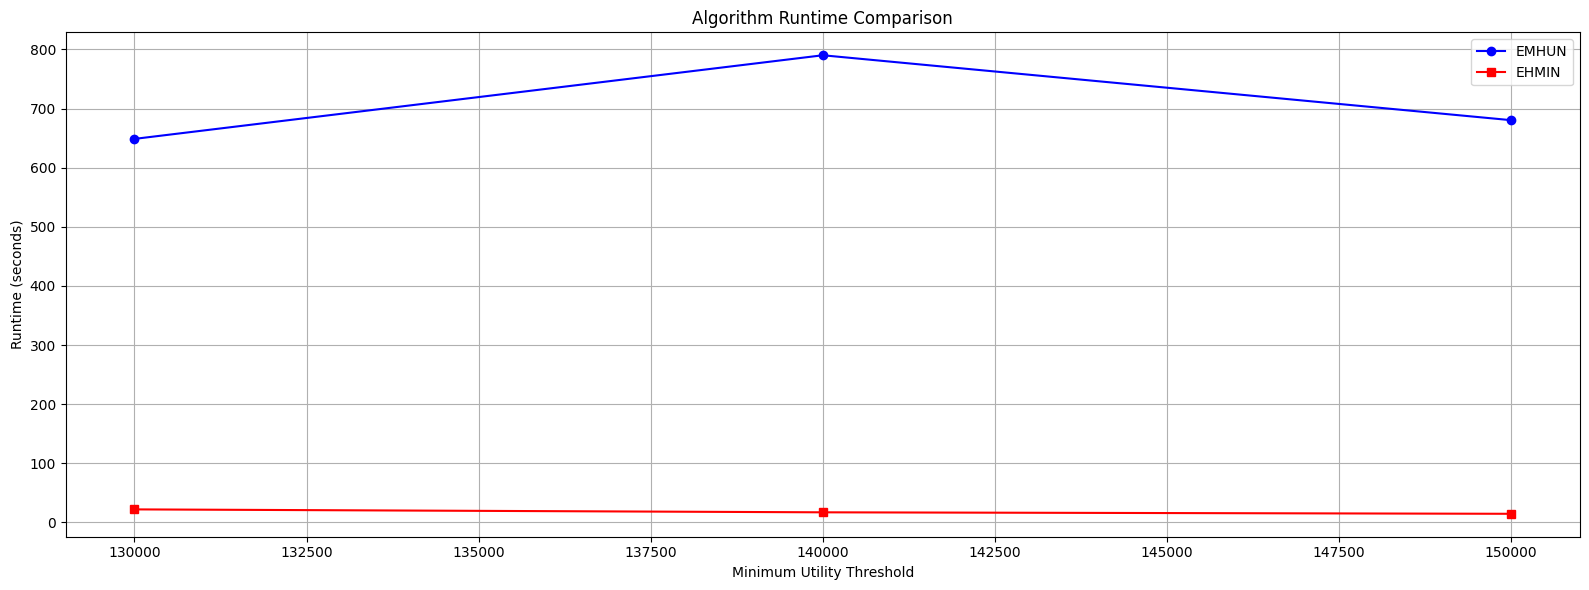

In [436]:
D = readFile("Data/chess_negative.txt")
min_arr = [13e4, 14e4, 15e4]
r1 = runTime_EMHUN(D, min_arr)
r2 = runTime_EHMIN(D, min_arr)
check_unique_results(r1[1], r2[1])
for r in r1[1]:
    print(r)
plotFile(r1[0], r2[0], min_arr)

True, all results are correct.
[['36', '90', '86'], 521469]
[['36', '90', '86', '34'], 486937]
[['36', '86'], 477016]
[['36', '86', '34'], 439413]
[['39', '36', '90', '86'], 421975]


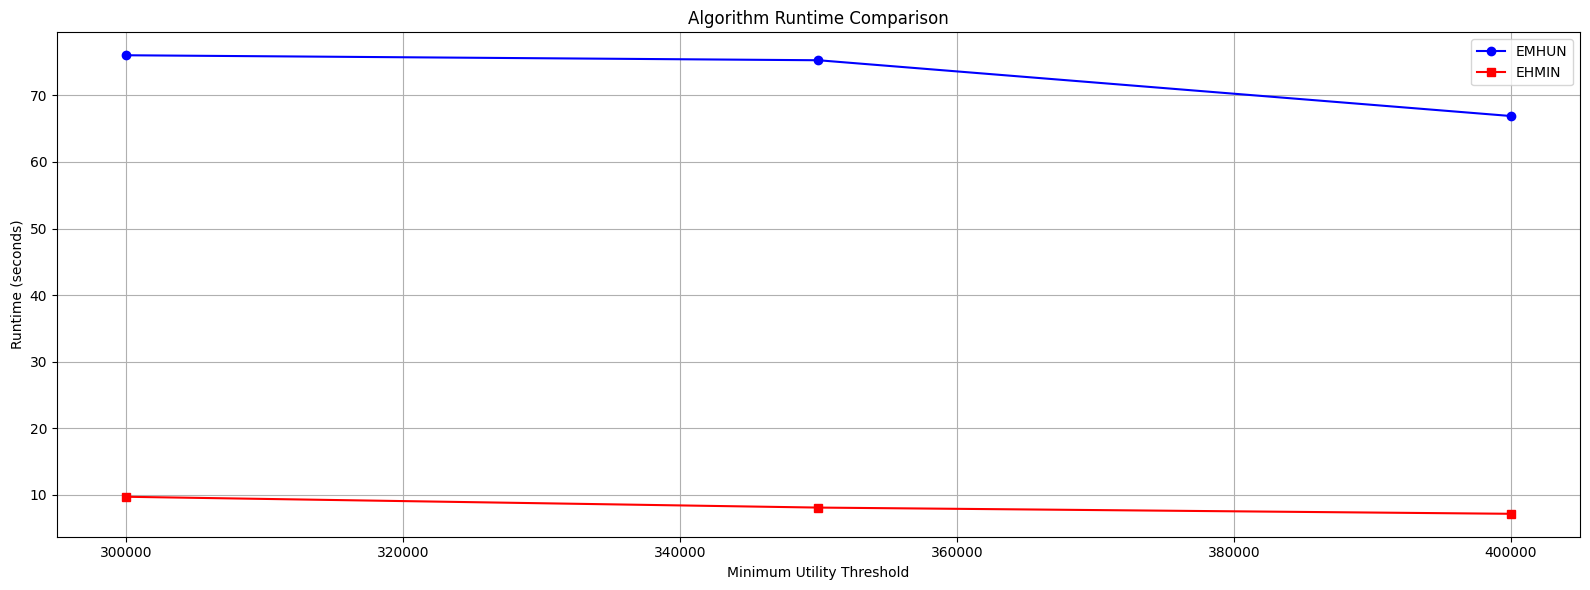

In [437]:
D = readFile("Data/mushroom_negative.txt")
min_arr = [3e5, 3.5e5, 4e5]
r1 = runTime_EMHUN(D, min_arr)
r2 = runTime_EHMIN(D, min_arr)
check_unique_results(r1[1], r2[1])
for r in r1[1]:
    print(r)
plotFile(r1[0], r2[0], min_arr) 

In [85]:
D = readFile("Data/accidents_negative.txt")
start = time.time()
res = EHMIN(D, 2.2e7, 5)
end = time.time()
for r in res:
    print(r)
print("Time:", end - start , "second")

[['8', '24', '21', '18', '17'], 24998815]
[['21', '18', '17'], 24883574]
[['8', '21', '18', '17'], 24117850]
[['63', '21', '18', '17'], 23348147]
[['28', '21', '18', '17'], 22027536]
Time: 6393.332269668579 second
